# Chi Sq Test GOF

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
# tips dataset
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [157]:
# sex column
# Are Male and Female customers equally likely in the restaurant?

# Null Hypothesis (Ho)-Male and Female customers are equally distributed
# Alternative Hypothesis (H1)-Male and Female customers are NOT equally distributed

In [56]:
alpha=0.05

In [58]:
# observed frequencies
observed=tips['sex'].value_counts()
observed 

sex
Male      157
Female     87
Name: count, dtype: int64

In [60]:
# expected frequencies for each categories
n=(len(tips['sex']))
expected=[n/2]*2
expected

[122.0, 122.0]

In [62]:
# apply chi-Sq test GOF
gof=stats.chisquare(f_obs=observed,f_exp=expected)
print(gof)

Power_divergenceResult(statistic=20.081967213114755, pvalue=7.419293713577076e-06)


In [64]:
chi_stats,p_val=stats.chisquare(f_obs=observed,f_exp=expected)
print('chi_stats',chi_stats)
print('P_val',p_val)

chi_stats 20.081967213114755
P_val 7.419293713577076e-06


In [66]:
if p_val<=alpha:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

Reject Ho


# There is strong evidence that the distribution of the categories is not equal.

# plot

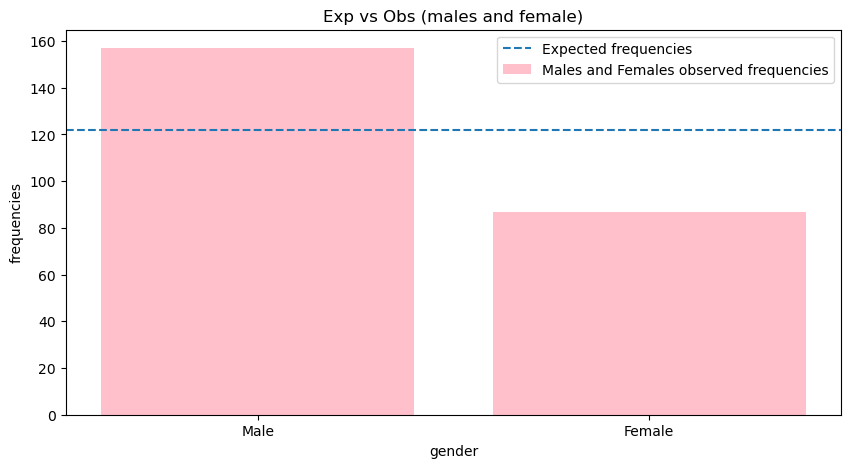

In [154]:
plt.figure(figsize=(10,5))
plt.bar(observed.index,observed.values,color='pink',label="Males and Females observed frequencies")
plt.axhline(y=n/2,linestyle='--',label='Expected frequencies')
plt.title("Exp vs Obs (males and female)")
plt.xlabel('gender')
plt.legend()
plt.ylabel('frequencies')
plt.show()

In [132]:
observed.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category', name='sex')

In [134]:
observed.values

array([157,  87], dtype=int64)